# Experiment 8: Implement Decision Tree by using Diabetes Dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [48]:
diabetes.feature_names
#diabetes.DESCR

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [49]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [50]:
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [51]:
diabetes.target_filename

'diabetes_target.csv.gz'

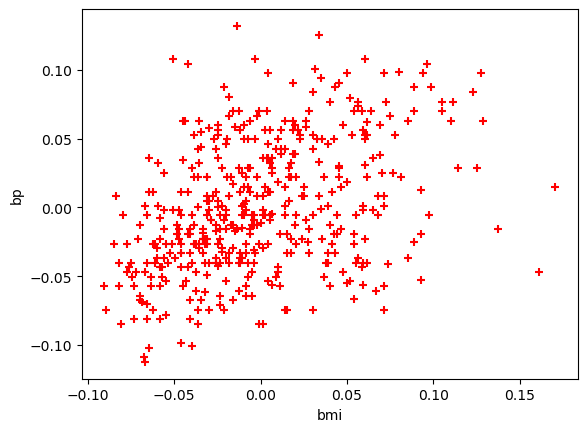

In [52]:
plt.xlabel('bmi')
plt.ylabel('bp')
plt.scatter(df['bmi'],df['bp'],color='red', marker='+')

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x = df.iloc[:,:-1]

In [55]:
y = df.iloc[:,:-1]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [57]:
from sklearn import tree
model = tree.DecisionTreeRegressor()

In [58]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [59]:
model.score(x_train,y_train)

1.0

In [60]:
model.score(x_test,y_test)

0.4675089195650946

In [61]:
model.predict(x_test[:6])

array([[-0.05273755, -0.04464164,  0.07139652, -0.07452744, -0.01532849,
        -0.00131388,  0.00446045, -0.02141183, -0.04688253,  0.00306441],
       [-0.00551455,  0.05068012, -0.04177375, -0.04354178, -0.07999827,
        -0.07615636, -0.03235593, -0.03949338,  0.01022672, -0.00936191],
       [ 0.01264814,  0.05068012,  0.03582872,  0.04941519,  0.05346915,
         0.0741549 , -0.06917231,  0.14501222,  0.04560437,  0.04862759],
       [ 0.03081083,  0.05068012,  0.05954058,  0.0563009 , -0.02220825,
         0.00119131, -0.03235593, -0.00259226, -0.02479543, -0.01764613],
       [-0.04910502, -0.04464164, -0.06440781, -0.10207025, -0.00294491,
        -0.01540556,  0.06336665, -0.04724262, -0.03324559, -0.05492509],
       [ 0.07076875, -0.04464164,  0.01211685,  0.04252949,  0.07135654,
         0.0534871 ,  0.05232174, -0.00259226,  0.02539508, -0.0052198 ]])

In [62]:
x_test[:6]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
143,-0.030942,-0.044642,0.005650,-0.009113,0.019070,0.006828,0.074412,-0.039493,-0.041176,-0.042499
298,0.023546,0.050680,-0.037463,-0.046985,-0.091006,-0.075530,-0.032356,-0.039493,-0.030748,-0.013504
123,0.005383,0.050680,0.034751,-0.001091,0.152538,0.198788,-0.061809,0.185234,0.015568,0.073480
342,0.056239,0.050680,0.021817,0.056301,-0.007073,0.018101,-0.032356,-0.002592,-0.023647,0.023775
128,-0.052738,-0.044642,-0.062252,-0.026328,-0.005697,-0.005072,0.030232,-0.039493,-0.030748,-0.071494
188,0.005383,-0.044642,-0.002973,0.049415,0.074108,0.070710,0.044958,-0.002592,-0.001496,-0.009362


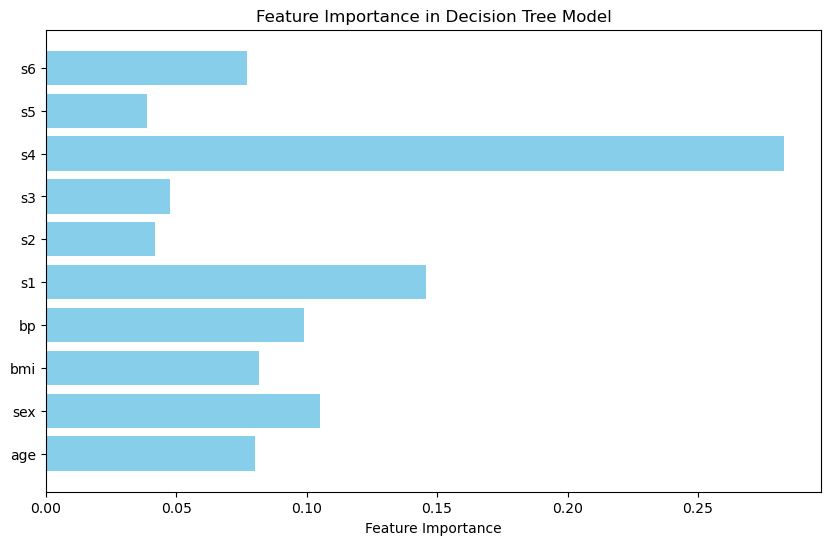

In [63]:
# Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(df.columns[:-1], importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Model")
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions with the best model
y_pred = best_model.predict(x_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_score = best_model.score(x_test, y_test)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2_score)

Mean Absolute Error (MAE): 0.017897036172815014
Root Mean Squared Error (RMSE): 0.024610082502067337
R^2 Score: 0.7131232986262743
